In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles for better visuals
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# Load the dataset from the data folder
df = pd.read_csv('../data/diabetes_readmission.csv')

# Display the first 5 rows of the dataset
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
# See how many unique values are in key demographic columns
print("Race categories:", df['race'].value_counts(dropna=False))
print("\nGender categories:", df['gender'].value_counts(dropna=False))
print("\nAge groups:", df['age'].value_counts(dropna=False))
print("\nReadmission outcomes:", df['readmitted'].value_counts(dropna=False))


Race categories: race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

Gender categories: gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

Age groups: age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

Readmission outcomes: readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


In [4]:
# 1. Drop invalid gender rows
df = df[df['gender'] != 'Unknown/Invalid']

# 2. Replace "?" in race with "Unknown"
df['race'] = df['race'].replace('?', 'Unknown')

# 3. Create new binary column for 30-day readmission
df['readmit_30'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# 4. Show the cleaned results
print("Updated race categories:\n", df['race'].value_counts())
print("\nUpdated gender categories:\n", df['gender'].value_counts())
print("\nNew readmit_30 breakdown:\n", df['readmit_30'].value_counts())


Updated race categories:
 race
Caucasian          76099
AfricanAmerican    19210
Unknown             2271
Hispanic            2037
Other               1505
Asian                641
Name: count, dtype: int64

Updated gender categories:
 gender
Female    54708
Male      47055
Name: count, dtype: int64

New readmit_30 breakdown:
 readmit_30
0    90406
1    11357
Name: count, dtype: int64


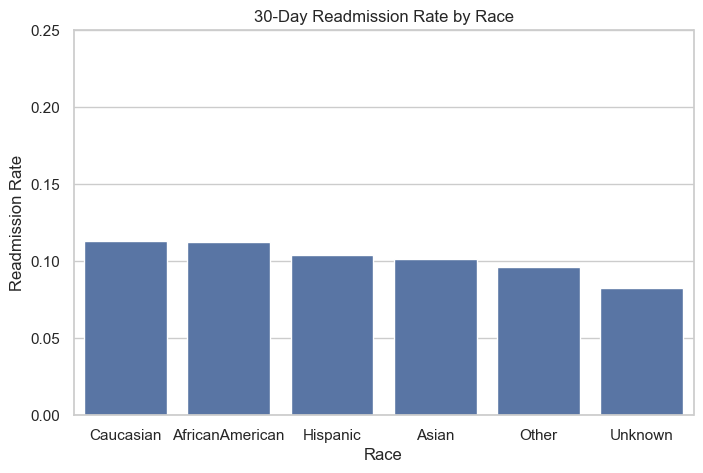

In [5]:
# Calculate readmission rate by race
race_readmit = df.groupby('race')['readmit_30'].mean().sort_values(ascending=False)

# Plot it
plt.figure(figsize=(8,5))
sns.barplot(x=race_readmit.index, y=race_readmit.values)
plt.title("30-Day Readmission Rate by Race")
plt.ylabel("Readmission Rate")
plt.xlabel("Race")
plt.ylim(0, 0.25)
plt.show()


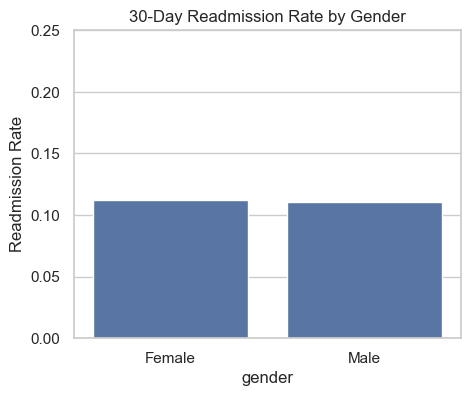

In [6]:
# Calculate readmission rate by gender
gender_readmit = df.groupby('gender')['readmit_30'].mean()

# Plot it
plt.figure(figsize=(5,4))
sns.barplot(x=gender_readmit.index, y=gender_readmit.values)
plt.title("30-Day Readmission Rate by Gender")
plt.ylabel("Readmission Rate")
plt.ylim(0, 0.25)
plt.show()


In [7]:
print("✅ Summary of Initial Findings")
print("\n1. Race Breakdown:")
print(df['race'].value_counts())

print("\n2. Gender Breakdown:")
print(df['gender'].value_counts())

print("\n3. 30-Day Readmission Breakdown:")
print(df['readmit_30'].value_counts())

print("\n4. Race-Based Readmission Rates (descending):")
print(race_readmit)

print("\n5. Gender-Based Readmission Rates:")
print(gender_readmit)


✅ Summary of Initial Findings

1. Race Breakdown:
race
Caucasian          76099
AfricanAmerican    19210
Unknown             2271
Hispanic            2037
Other               1505
Asian                641
Name: count, dtype: int64

2. Gender Breakdown:
gender
Female    54708
Male      47055
Name: count, dtype: int64

3. 30-Day Readmission Breakdown:
readmit_30
0    90406
1    11357
Name: count, dtype: int64

4. Race-Based Readmission Rates (descending):
race
Caucasian          0.112906
AfricanAmerican    0.112181
Hispanic           0.104075
Asian              0.101404
Other              0.096346
Unknown            0.082783
Name: readmit_30, dtype: float64

5. Gender-Based Readmission Rates:
gender
Female    0.112452
Male      0.110615
Name: readmit_30, dtype: float64
